In [4]:
import random
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/Users/kenn/anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [5]:
y_values = np.array([random.random()*10 for x in range(200)])

In [6]:
print(y_values.shape)

(200,)


In [31]:
x_values = np.random.randn(200, 20)
x_values  = sm.add_constant(x_values)

In [32]:
print(x_values.shape)

(200, 21)


In [34]:
print(pd.DataFrame(x_values).head())

   0         1         2         3         4         5         6         7   \
0   1  0.377953  2.035439  1.293103  1.670890 -0.375805  0.714043 -0.603639   
1   1  1.472930  0.402922 -0.995643  0.546270  0.099363  0.626229 -0.295373   
2   1  1.450603 -1.117145  0.118194  0.130026  0.138898  1.528756  0.708547   
3   1 -0.301029 -0.236533  0.956292 -0.586589  0.340391  0.161275 -0.520283   
4   1 -0.783579  0.661201  0.484801  0.150870  1.675218  0.025640  1.038360   

         8         9     ...           11        12        13        14  \
0  0.496677  1.833681    ...     0.962509  0.282149 -0.987021  1.346188   
1  0.076342 -0.544490    ...     0.283633  0.815548 -0.311559  0.910021   
2 -0.782356  2.988030    ...     0.578387 -2.924248 -0.208166 -0.360576   
3 -1.628584 -0.694824    ...    -2.845164 -0.785266 -0.622762  0.864420   
4  0.128006 -0.058958    ...     0.489810  0.476494  0.220680 -1.322885   

         15        16        17        18        19        20  
0  1.75053

In [18]:
model = sm.OLS(y_values,x_values)

In [19]:
result = model.fit()

In [20]:
print(result.rsquared, result.rsquared_adj)

0.0734330399127 -0.0300939947339


In [21]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                 -0.030
Method:                 Least Squares   F-statistic:                    0.7093
Date:                Fri, 22 Jan 2016   Prob (F-statistic):              0.814
Time:                        11:25:45   Log-Likelihood:                -487.10
No. Observations:                 200   AIC:                             1016.
Df Residuals:                     179   BIC:                             1085.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          4.9865      0.217     23.018      0.000         4.559     5.414
x1             0.1163      0.221      0.526      0.600        -0.320     0.553
x2             0.2882      0.218      1.320      0.188        -0.143     0.719
x3            -0.1560      0.215     -0.726      0.468        -0.580     0.268
x4            -0.2425      0.203     -1.193      0.235        -0.644     0.159
x5            -0.1120      0.212     -0.530      0.597        -0.530     0.305
x6             0.1468      0.222      0.663      0.508        -0.290     0.584
x7            -0.1823      0.215     -0.847      0.398        -0.607     0.242
x8            -0.1735      0.211     -0.824      0.411        -0.589     0.242
x9            -0.2054      0.213     -0.965      0.336        -0.626     0.215
x10            0.0402      0.207      0.194      0.846        -0.368     0.449
x11            0.0924      0.209      0.443      0.659        -0.319     0.504
x12           -0.4366      0.234     -1.862      0.064        -0.899     0.026
x13            0.0201      0.194      0.104      0.917        -0.362     0.402
x14            0.0627      0.211      0.297      0.767        -0.354     0.479
x15            0.0596      0.224      0.266      0.791        -0.383     0.502
x16            0.0739      0.208      0.355      0.723        -0.337     0.485
x17            0.3277      0.211      1.557      0.121        -0.088     0.743
x18            0.0014      0.222      0.006      0.995        -0.437     0.440
x19           -0.0068      0.212     -0.032      0.975        -0.425     0.411
x20           -0.2111      0.238     -0.886      0.377        -0.681     0.259
==============================================================================
Omnibus:                       24.476   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.345
Skew:                          -0.079   Prob(JB):                       0.0254
Kurtosis:                       2.075   Cond. No.                         1.85
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
def getOLSRs(num_x, num_y):
    y_values = np.array([random.random()*10 for x in range(num_y)])
    x_values = np.random.randn(num_y, num_x)
    x_values  = sm.add_constant(x_values)
    model = sm.OLS(y_values,x_values)
    result = model.fit()
    return result.rsquared, result.rsquared_adj

In [14]:
def getRsForDifferentX():
    x_list = []
    r_square_list = []
    r_square_adj_list = []
    
    for x in range(20,100):
        x_list.append(x)
        temp_rsq, temp_rsq_adj = getOLSRs(x,200)
        r_square_list.append(temp_rsq)
        r_square_adj_list.append(temp_rsq_adj)
        
    plt.plot(x_list,r_square_list, label='R sqr')
    plt.plot(x_list,r_square_adj_list, label='R sqr adjusted')
    plt.legend(loc='upper left')

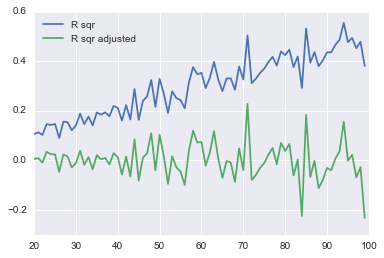

In [15]:
getRsForDifferentX()